In [11]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.nn.functional import softmax

In [12]:
df = pd.read_csv('./tweets_cleaned.csv')
df.head()

,username,content,timestamp,clean_text,tokens,filtered_tokens
0,@sigittricahyono,"Lebih dari itu, masih banyak program lain yg s...",2025-04-24T06:59:11.000Z,lebih dari itu masih banyak program lain yg se...,"['lebih', 'dari', 'itu', 'masih', 'banyak', 'p...","['program', 'menimbulkan', 'efek', 'domino', '..."
1,@hejin234,Rapat Dpr yg membahas anggaran pendidikan dila...,2025-04-24T05:03:32.000Z,rapat dpr yg membahas anggaran pendidikan dila...,"['rapat', 'dpr', 'yg', 'membahas', 'anggaran',...","['rapat', 'dpr', 'membahas', 'anggaran', 'pend..."
2,@idthreedots,ini tu salah satu bukti ketololan pendidikan k...,2025-04-24T00:32:49.000Z,ini tu salah satu bukti ketololan pendidikan k...,"['ini', 'tu', 'salah', 'satu', 'bukti', 'ketol...","['salah', 'bukti', 'ketololan', 'pendidikan', ..."
3,@Joyparksyoungs,Lagi2 dampak efisiensi anggaran pendidikan. Ba...,2025-04-23T16:00:04.000Z,lagi dampak efisiensi anggaran pendidikan baru...,"['lagi', 'dampak', 'efisiensi', 'anggaran', 'p...","['dampak', 'efisiensi', 'anggaran', 'pendidika..."
4,@anxtrousm,"""kesenjangan pendidikan"" dan kebijakan pemerin...",2025-04-23T13:11:29.000Z,kesenjangan pendidikan dan kebijakan pemerinta...,"['kesenjangan', 'pendidikan', 'dan', 'kebijaka...","['kesenjangan', 'pendidikan', 'kebijakan', 'pe..."


In [13]:
tokenizer = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("indolem/indobertweet-base-uncased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [15]:
def predict_sentiment(text):
    # Tokenisasi
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}
    
    # Prediksi
    with torch.no_grad():
        outputs = model(**inputs)
    
    logits = outputs.logits
    probs = softmax(logits, dim=1)
    prob_values = probs.cpu().numpy()[0]
    
    # Ambil label tertinggi
    pred_label = prob_values.argmax()
    
    return pred_label, prob_values

label_map = {0: "negative", 1: "neutral", 2: "positive"}

In [16]:
sentiments = []

for text in df['content']:  # Ganti 'text_column_name' ke nama kolom yang sesuai
    label, probs = predict_sentiment(text)
    sentiments.append(label_map[label])

In [17]:
df['sentiment'] = sentiments

df.to_csv('./tweets_with_label.csv', index=False)

In [18]:
df[['content', 'sentiment']].head()

,content,sentiment
0,"Lebih dari itu, masih banyak program lain yg s...",negative
1,Rapat Dpr yg membahas anggaran pendidikan dila...,negative
2,ini tu salah satu bukti ketololan pendidikan k...,negative
3,Lagi2 dampak efisiensi anggaran pendidikan. Ba...,negative
4,"""kesenjangan pendidikan"" dan kebijakan pemerin...",negative


In [1]:
import pandas as pd
data = pd.read_csv('./tweets_with_label.csv')

In [8]:
data.head()

,username,content,timestamp,clean_text,tokens,filtered_tokens,sentiment
0,@sigittricahyono,"Lebih dari itu, masih banyak program lain yg s...",2025-04-24T06:59:11.000Z,lebih dari itu masih banyak program lain yg se...,"['lebih', 'dari', 'itu', 'masih', 'banyak', 'p...","['program', 'menimbulkan', 'efek', 'domino', '...",negative
1,@hejin234,Rapat Dpr yg membahas anggaran pendidikan dila...,2025-04-24T05:03:32.000Z,rapat dpr yg membahas anggaran pendidikan dila...,"['rapat', 'dpr', 'yg', 'membahas', 'anggaran',...","['rapat', 'dpr', 'membahas', 'anggaran', 'pend...",negative
2,@idthreedots,ini tu salah satu bukti ketololan pendidikan k...,2025-04-24T00:32:49.000Z,ini tu salah satu bukti ketololan pendidikan k...,"['ini', 'tu', 'salah', 'satu', 'bukti', 'ketol...","['salah', 'bukti', 'ketololan', 'pendidikan', ...",negative
3,@Joyparksyoungs,Lagi2 dampak efisiensi anggaran pendidikan. Ba...,2025-04-23T16:00:04.000Z,lagi dampak efisiensi anggaran pendidikan baru...,"['lagi', 'dampak', 'efisiensi', 'anggaran', 'p...","['dampak', 'efisiensi', 'anggaran', 'pendidika...",negative
4,@anxtrousm,"""kesenjangan pendidikan"" dan kebijakan pemerin...",2025-04-23T13:11:29.000Z,kesenjangan pendidikan dan kebijakan pemerinta...,"['kesenjangan', 'pendidikan', 'dan', 'kebijaka...","['kesenjangan', 'pendidikan', 'kebijakan', 'pe...",negative


<Axes: xlabel='sentiment'>

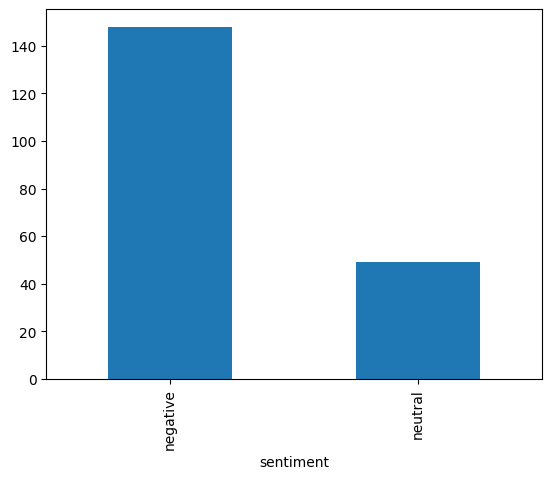

In [5]:
data["sentiment"].value_counts().plot(kind='bar')